# Decode

In [18]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import warnings

train_images_idx3_ubyte_file = './MNIST/train-images.idx3-ubyte'
train_labels_idx1_ubyte_file = './MNIST/train-labels.idx1-ubyte'

test_images_idx3_ubyte_file = './MNIST/t10k-images.idx3-ubyte'
test_labels_idx1_ubyte_file = './MNIST/t10k-labels.idx1-ubyte'

def decode_idx3_ubyte(idx3_ubyte_file):
    bin_data = open(idx3_ubyte_file, 'rb').read()

    offset = 0
    fmt_header = '>IIII'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print ("magic:%d, count: %d, size: %d*%d" % (magic_number, num_images, num_rows, num_cols))

    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images

def decode_idx1_ubyte(idx1_ubyte_file):
    bin_data = open(idx1_ubyte_file, 'rb').read()

    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print("magic:%d, num_images: %d 張" % (magic_number, num_images))

    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels

# Load Data

In [19]:
def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    return decode_idx1_ubyte(idx_ubyte_file)

# 正規化&三種不同的初始化參數

In [20]:
def normalize_data(ima):
    a_max=np.max(ima)
    a_min=np.min(ima)
    for j in range(ima.shape[0]): #ima.shape[0]是灰度圖
        ima[j]=(ima[j]-a_min)/(a_max-a_min)
    return ima

def initialize_parameters_random(n_x,n_h,n_y):
   
    np.random.seed(3)
    W1 = np.random.randn(n_h, n_x)*0.1
    b1 = np.zeros([n_h, 1])
    W2 = np.random.randn(n_y, n_h)*0.1
    b2 = np.zeros([n_y, 1])

    #每一張train_image=(28*28 ,1)
    #W1=(第一層neuron數 ,28*28)
    #b1=(第一層neuron數 ,1)
    #W2=(第二層neuron數 ,第一層neuron數)
    #b2=(第二層neuron數 .1)
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h)) 
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def initialize_parameters_Xavier(n_x,n_h,n_y):
   
    np.random.seed(3)
    W1 = np.random.randn(n_h, n_x)/np.sqrt(n_h)
    b1 = np.zeros([n_h, 1])
    W2 = np.random.randn(n_y, n_h)/np.sqrt(n_y)
    b2 = np.zeros([n_y, 1])

    #每一張train_image=(28*28 ,1)
    #W1=(第一層neuron數 ,28*28)
    #b1=(第一層neuron數 ,1)
    #W2=(第二層neuron數 ,第一層neuron數)
    #b2=(第二層neuron數 .1)
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def initialize_parameters_he(n_x,n_h,n_y):
   
    np.random.seed(3)
    W1 = np.random.randn(n_h, n_x)/np.sqrt(n_h/2)
    b1 = np.zeros([n_h, 1])
    W2 = np.random.randn(n_y, n_h)/np.sqrt(n_y/2)
    b2 = np.zeros([n_y, 1])

    #每一張train_image=(28*28 ,1)
    #W1=(第一層neuron數 ,28*28)
    #b1=(第一層neuron數 ,1)
    #W2=(第二層neuron數 ,第一層neuron數)
    #b2=(第二層neuron數 .1)
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h)) 
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# 前向傳播&損失函數(cross entropy)

In [21]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.maximum(0,Z1) #Relu
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

def costloss(A2,Y,parameters):
    #L = (−1/m) ∑(i) (y(i)*log(a[2]) + (1−y(i))*log(1−a[2])
    logprobs=np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost=-np.sum(logprobs,axis=0,keepdims=True)/A2.shape[0]
    cost = np.squeeze(cost)
    return cost

# 反向傳播&更新參數 

In [22]:
def back_propagation(parameters,cache,X,Y):

    W1=parameters["W1"]
    W2=parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Sigmoid (back propagation)
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
    temp_s = 1/(1+np.exp(-Z2))
    dZ2 = dA2 * temp_s * (1-temp_s)      
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T,dZ2)
    
    # ReLU (back propagation)
    dZ1 = np.array(dA1, copy=True) # just converting dz to a correct object.
    dZ1[Z1 <= 0] = 0   # When z <= 0, you should set dz to 0 as well. 
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    # print("Dw2:",dW2)
    # print("Db2:",db2)
    return grads

def update_para(parameters, grads, learning_rate ):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    

    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2

    #print("W1",W1)
    #print("W2",W2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [23]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s
def image2vector(image):
    v=np.reshape(image,[784,1])
    return v
def softmax(x):
    v=np.argmax(x)
    return v

# 主程式(initialize_parameters_random)

magic:2051, count: 60000, size: 28*28
magic:2049, num_images: 60000 張
magic:2051, count: 10000, size: 28*28
magic:2049, num_images: 10000 張
第0次迭代:
cost=: 0.542309624925118
第1000次迭代:
cost=: 0.12167951020785697
第2000次迭代:
cost=: 0.3460756836488782
第3000次迭代:
cost=: 0.19023395946231483
第4000次迭代:
cost=: 0.027193521076013284
第5000次迭代:
cost=: 0.05871551024727909
第6000次迭代:
cost=: 0.0012618774391002438
第7000次迭代:
cost=: 0.060707948918445866
第8000次迭代:
cost=: 0.0002286230971456765
第9000次迭代:
cost=: 0.045675511844727026
第10000次迭代:
cost=: 0.0004151566456279725
第11000次迭代:
cost=: 0.0031995910206506994
第12000次迭代:
cost=: 0.013869075216900312
第13000次迭代:
cost=: 0.04351935068928476
第14000次迭代:
cost=: 0.001483245566256553
第15000次迭代:
cost=: 0.010655733429737139
第16000次迭代:
cost=: 0.00021760515083589713
第17000次迭代:
cost=: 0.047949065276083856
第18000次迭代:
cost=: 0.009566508111454618
第19000次迭代:
cost=: 0.02129815321364937
第20000次迭代:
cost=: 0.0023376182236120495
第21000次迭代:
cost=: 0.043382263291162494
第22000次迭代:
cost=: 

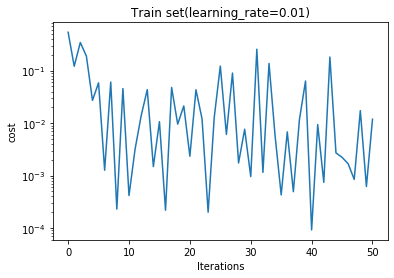

test set的正確率(%): 94.45
第0次迭代:
cost=: 0.542309624925118
第1000次迭代:
cost=: 0.33456884697282585
第2000次迭代:
cost=: 0.3124957739418834
第3000次迭代:
cost=: 0.3517780041251985
第4000次迭代:
cost=: 0.17656111496554286
第5000次迭代:
cost=: 0.1647168023624354
第6000次迭代:
cost=: 0.05721953512707675
第7000次迭代:
cost=: 0.2310447806370742
第8000次迭代:
cost=: 0.015741851727160656
第9000次迭代:
cost=: 0.23942221196570226
第10000次迭代:
cost=: 0.01669584051684124
第11000次迭代:
cost=: 0.019639182334785888
第12000次迭代:
cost=: 0.04527327460670792
第13000次迭代:
cost=: 0.18596679886584394
第14000次迭代:
cost=: 0.031106997300603866
第15000次迭代:
cost=: 0.1121254773108071
第16000次迭代:
cost=: 0.009975863001549137
第17000次迭代:
cost=: 0.08940728995565353
第18000次迭代:
cost=: 0.09179625877448289
第19000次迭代:
cost=: 0.05414353048142571
第20000次迭代:
cost=: 0.012436943049196347
第21000次迭代:
cost=: 0.2205209357551285
第22000次迭代:
cost=: 0.1219454311806785
第23000次迭代:
cost=: 0.012555761004044045
第24000次迭代:
cost=: 0.03771670694512645
第25000次迭代:
cost=: 0.1642617505480169
第26000

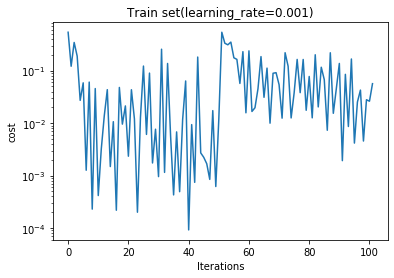

test set的正確率(%): 91.16
第0次迭代:
cost=: 0.542309624925118
第1000次迭代:
cost=: 0.4784989876723477
第2000次迭代:
cost=: 0.3028193849127955
第3000次迭代:
cost=: 0.3925946879406038
第4000次迭代:
cost=: 0.33940460632007324
第5000次迭代:
cost=: 0.3251448977159993
第6000次迭代:
cost=: 0.2703944004454444
第7000次迭代:
cost=: 0.35931210257763263
第8000次迭代:
cost=: 0.2807233775880794
第9000次迭代:
cost=: 0.33067217805423255
第10000次迭代:
cost=: 0.23912143714074546
第11000次迭代:
cost=: 0.2187964284491782
第12000次迭代:
cost=: 0.33461281069424653
第13000次迭代:
cost=: 0.4092164773733426
第14000次迭代:
cost=: 0.29374141536328474
第15000次迭代:
cost=: 0.3144294686106304
第16000次迭代:
cost=: 0.2670414853405581
第17000次迭代:
cost=: 0.26036103808849587
第18000次迭代:
cost=: 0.18787175492980407
第19000次迭代:
cost=: 0.24289580342512024
第20000次迭代:
cost=: 0.3240148591190247
第21000次迭代:
cost=: 0.2986059411085718
第22000次迭代:
cost=: 0.30255553834033005
第23000次迭代:
cost=: 0.21179900830911427
第24000次迭代:
cost=: 0.23845552927894245
第25000次迭代:
cost=: 0.2926883673389497
第26000次迭代:
cost=:

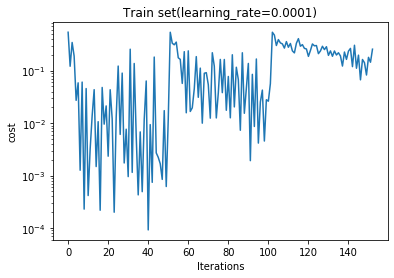

test set的正確率(%): 78.35


In [24]:
if __name__ == '__main__':
    
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    n_x=28*28
    n_h=32
    n_y=10
    costs=[]
    Iterations = 50000
    #learning rate
    ttt1=0.01  
    ttt2=0.001
    ttt3=0.0001
    warnings.filterwarnings('ignore')
    
    ############################## learning_rate=0.01 ########################################
    parameters=initialize_parameters_random(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt1)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.01)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    
   
    ################################# learning_rate=0.001 #######################################
    parameters=initialize_parameters_random(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt2)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    
  
    ########################### learning_rate=0.0001 #####################################
    parameters=initialize_parameters_random(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt3)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.0001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()

    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    

# 主程式(initialize_parameters_Xavier)

magic:2051, count: 60000, size: 28*28
magic:2049, num_images: 60000 張
magic:2051, count: 10000, size: 28*28
magic:2049, num_images: 10000 張
第0次迭代:
cost=: 0.3616389323377975
第1000次迭代:
cost=: 0.12373823074922803
第2000次迭代:
cost=: 0.3717153792317936
第3000次迭代:
cost=: 0.18776396240454163
第4000次迭代:
cost=: 0.014277369553708869
第5000次迭代:
cost=: 0.10872346088066638
第6000次迭代:
cost=: 0.0013672673510821862
第7000次迭代:
cost=: 0.048004759275827126
第8000次迭代:
cost=: 0.00010586554388010289
第9000次迭代:
cost=: 0.055903113906247616
第10000次迭代:
cost=: 0.0008725042776425069
第11000次迭代:
cost=: 0.0013912049942473726
第12000次迭代:
cost=: 0.015937824712541168
第13000次迭代:
cost=: 0.057592422604964576
第14000次迭代:
cost=: 0.0025817806076342555
第15000次迭代:
cost=: 0.010062436368873273
第16000次迭代:
cost=: 0.00014313225098791903
第17000次迭代:
cost=: 0.02101517320904254
第18000次迭代:
cost=: 0.0022639310070650676
第19000次迭代:
cost=: 0.007801834734211982
第20000次迭代:
cost=: 0.004163017977260816
第21000次迭代:
cost=: 0.08772969574755639
第22000次迭代:
cost

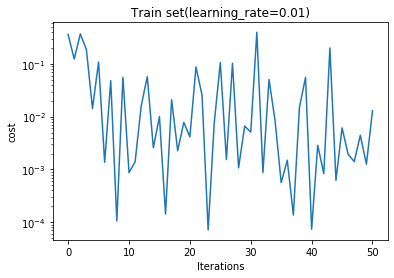

test set的正確率(%): 94.3
第0次迭代:
cost=: 0.3616389323377975
第1000次迭代:
cost=: 0.42757436709856667
第2000次迭代:
cost=: 0.32865226444704426
第3000次迭代:
cost=: 0.5031135624013819
第4000次迭代:
cost=: 0.0983529126348815
第5000次迭代:
cost=: 0.09876113149249499
第6000次迭代:
cost=: 0.02190153345898555
第7000次迭代:
cost=: 0.35065038149092076
第8000次迭代:
cost=: 0.005052910682133781
第9000次迭代:
cost=: 0.2936264216877543
第10000次迭代:
cost=: 0.005042305222108489
第11000次迭代:
cost=: 0.011249536167493097
第12000次迭代:
cost=: 0.030889495034404985
第13000次迭代:
cost=: 0.206926039670721
第14000次迭代:
cost=: 0.017633509732049087
第15000次迭代:
cost=: 0.06007178002491892
第16000次迭代:
cost=: 0.005340868571534077
第17000次迭代:
cost=: 0.10100055694917602
第18000次迭代:
cost=: 0.04962199670675667
第19000次迭代:
cost=: 0.036546475636370854
第20000次迭代:
cost=: 0.007539726451849428
第21000次迭代:
cost=: 0.25020575264750744
第22000次迭代:
cost=: 0.10141228326536977
第23000次迭代:
cost=: 0.0059234782144280745
第24000次迭代:
cost=: 0.02258706801858901
第25000次迭代:
cost=: 0.1713158966155269


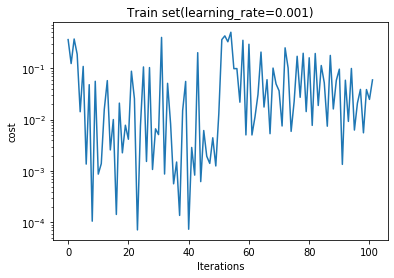

test set的正確率(%): 91.31
第0次迭代:
cost=: 0.3616389323377975
第1000次迭代:
cost=: 0.5565062133420655
第2000次迭代:
cost=: 0.35655076476416586
第3000次迭代:
cost=: 0.6683725552487941
第4000次迭代:
cost=: 0.3458779400671978
第5000次迭代:
cost=: 0.33041536740327204
第6000次迭代:
cost=: 0.19803158959648465
第7000次迭代:
cost=: 0.49427135344910217
第8000次迭代:
cost=: 0.20712070218690332
第9000次迭代:
cost=: 0.35653610556409143
第10000次迭代:
cost=: 0.10542723325706813
第11000次迭代:
cost=: 0.0659899401372004
第12000次迭代:
cost=: 0.3983776030745472
第13000次迭代:
cost=: 0.45245454391954354
第14000次迭代:
cost=: 0.15806478555641718
第15000次迭代:
cost=: 0.21862694163483445
第16000次迭代:
cost=: 0.13345601648351635
第17000次迭代:
cost=: 0.341257421369194
第18000次迭代:
cost=: 0.07287134322293118
第19000次迭代:
cost=: 0.12170224430742682
第20000次迭代:
cost=: 0.25269162332098244
第21000次迭代:
cost=: 0.30112077338779425
第22000次迭代:
cost=: 0.2604366114672866
第23000次迭代:
cost=: 0.12812132268022913
第24000次迭代:
cost=: 0.1522257027147109
第25000次迭代:
cost=: 0.22713429130345633
第26000次迭代:
c

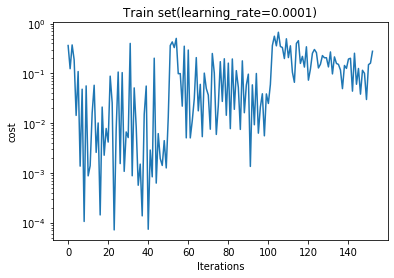

test set的正確率(%): 79.07


In [25]:
if __name__ == '__main__':
    
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    n_x=28*28
    n_h=32
    n_y=10
    costs=[]
    Iterations = 50000
    #learning rate
    ttt1=0.01  
    ttt2=0.001
    ttt3=0.0001
    warnings.filterwarnings('ignore')
    
    ############################## learning_rate=0.01 ########################################
    parameters=initialize_parameters_Xavier(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt1)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.01)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    
    ################################# learning_rate=0.001 #######################################
    parameters=initialize_parameters_Xavier(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt2)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    
    ########################### learning_rate=0.0001 #####################################
    parameters=initialize_parameters_Xavier(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt3)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.0001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()

    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
 

# 主程式(initialize_parameters_he)

magic:2051, count: 60000, size: 28*28
magic:2049, num_images: 60000 張
magic:2051, count: 10000, size: 28*28
magic:2049, num_images: 10000 張
第0次迭代:
cost=: 0.45257867848283206
第1000次迭代:
cost=: 0.12095460730414967
第2000次迭代:
cost=: 0.6040608799539886
第3000次迭代:
cost=: 0.1650453884984873
第4000次迭代:
cost=: 0.0287893623490309
第5000次迭代:
cost=: 0.16270889487770968
第6000次迭代:
cost=: 0.0012428961360573761
第7000次迭代:
cost=: 0.05591341578248114
第8000次迭代:
cost=: 8.673863183602737e-05
第9000次迭代:
cost=: 0.036864357606832585
第10000次迭代:
cost=: 0.000675591980458746
第11000次迭代:
cost=: 0.004935024254646007
第12000次迭代:
cost=: 0.023433513100109216
第13000次迭代:
cost=: 0.03674800056593291
第14000次迭代:
cost=: 0.001519698992389685
第15000次迭代:
cost=: 0.0037432385704198254
第16000次迭代:
cost=: 0.00010733457431385452
第17000次迭代:
cost=: 0.012766563220398517
第18000次迭代:
cost=: 0.011369523926100371
第19000次迭代:
cost=: 0.018303655230189016
第20000次迭代:
cost=: 0.011156379640514684
第21000次迭代:
cost=: 0.15450782068211993
第22000次迭代:
cost=: 0.02

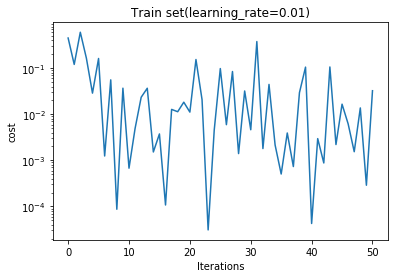

test set的正確率(%): 93.88
第0次迭代:
cost=: 0.45257867848283206
第1000次迭代:
cost=: 0.549242060404665
第2000次迭代:
cost=: 0.42755447881055797
第3000次迭代:
cost=: 0.5743584051378173
第4000次迭代:
cost=: 0.09970360758964468
第5000次迭代:
cost=: 0.12106652036145693
第6000次迭代:
cost=: 0.020493088002913044
第7000次迭代:
cost=: 0.33513469557188424
第8000次迭代:
cost=: 0.010327698023893982
第9000次迭代:
cost=: 0.3580946665842498
第10000次迭代:
cost=: 0.0033665933699416626
第11000次迭代:
cost=: 0.02555452659968155
第12000次迭代:
cost=: 0.020564089219168732
第13000次迭代:
cost=: 0.200392936688998
第14000次迭代:
cost=: 0.013695809893228822
第15000次迭代:
cost=: 0.031426655567592526
第16000次迭代:
cost=: 0.0041592890848365606
第17000次迭代:
cost=: 0.10544073483408604
第18000次迭代:
cost=: 0.032125154630875036
第19000次迭代:
cost=: 0.022397946852016376
第20000次迭代:
cost=: 0.022891641000949807
第21000次迭代:
cost=: 0.23283546585633128
第22000次迭代:
cost=: 0.062037578035261845
第23000次迭代:
cost=: 0.004784935239327442
第24000次迭代:
cost=: 0.03639056781907822
第25000次迭代:
cost=: 0.179144119342

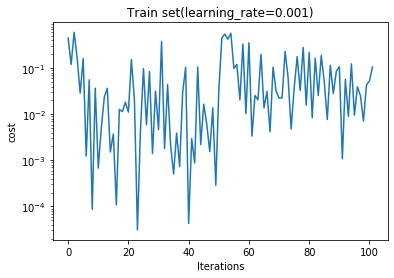

test set的正確率(%): 90.14
第0次迭代:
cost=: 0.45257867848283206
第1000次迭代:
cost=: 0.8205348799484098
第2000次迭代:
cost=: 0.5228813700151524
第3000次迭代:
cost=: 0.9823723036975931
第4000次迭代:
cost=: 0.39654125722559963
第5000次迭代:
cost=: 0.38341626429162445
第6000次迭代:
cost=: 0.18056460314309047
第7000次迭代:
cost=: 0.6562579356316461
第8000次迭代:
cost=: 0.17869919746015522
第9000次迭代:
cost=: 0.42663814507988107
第10000次迭代:
cost=: 0.05492515531518272
第11000次迭代:
cost=: 0.048089053023390914
第12000次迭代:
cost=: 0.5151830390727337
第13000次迭代:
cost=: 0.48515822815041787
第14000次迭代:
cost=: 0.12017319239839282
第15000次迭代:
cost=: 0.14680018507076553
第16000次迭代:
cost=: 0.09247049063484114
第17000次迭代:
cost=: 0.49065859877817175
第18000次迭代:
cost=: 0.03565404021939811
第19000次迭代:
cost=: 0.08034201632757536
第20000次迭代:
cost=: 0.30657842065921453
第21000次迭代:
cost=: 0.33739963411306817
第22000次迭代:
cost=: 0.26695499053354704
第23000次迭代:
cost=: 0.07573736487610136
第24000次迭代:
cost=: 0.18058760852576675
第25000次迭代:
cost=: 0.2030803284746729
第26000次

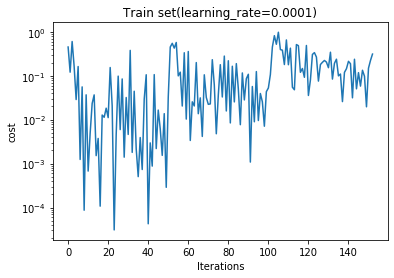

test set的正確率(%): 74.98


In [26]:
if __name__ == '__main__':
    
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    n_x=28*28
    n_h=32
    n_y=10
    costs=[]
    Iterations = 50000
    #learning rate
    ttt1=0.01  
    ttt2=0.001
    ttt3=0.0001
    warnings.filterwarnings('ignore')
    
    ############################## learning_rate=0.01 ########################################
    parameters=initialize_parameters_he(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt1)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.01)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    
    ################################# learning_rate=0.001 #######################################
    parameters=initialize_parameters_he(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt2)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()
    
    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))

    ########################### learning_rate=0.0001 #####################################
    parameters=initialize_parameters_he(n_x,n_h,n_y)
    for i in range(Iterations):
        img_train=train_images[i]
        label_train=np.zeros((10,1))
        
        label_train[int(train_labels[i])]=1
        imgvector1=image2vector(img_train)
        imgvector=normalize_data(imgvector1)

        A2,cache=forward_propagation(imgvector,parameters)
        pre_label=softmax(A2)
        loss=costloss(A2,label_train,parameters)
        grads = back_propagation(parameters, cache, imgvector, label_train)
        parameters = update_para(parameters, grads, learning_rate = ttt3)
        
        if i%1000==0:
            costs.append(loss)
            print("第%i次迭代:"%(i))
            print("cost=:" ,loss)
    #最後一次迭代的loss
    print("第%i次迭代:"%(i))
    print("cost=:" ,loss)
    costs.append(loss)

    plt.figure()
    plt.semilogy(costs)
    plt.title("Train set(learning_rate=0.0001)")
    plt.xlabel("Iterations")
    plt.ylabel("cost")
    plt.show()

    correct=0 #correct正確識別了的圖片數
    corrects = []
    for i in range(10000):
        img_train=test_images[i]
        vector_image=normalize_data(image2vector(img_train))
        label_trainx=test_labels[i]
        aa2,xxx=forward_propagation(vector_image,parameters)
        predict_value=softmax(aa2)
        if predict_value==int(label_trainx):
            correct=correct+1
        corrects.append(round((correct/10000)*100,2))
        
    print("test set的正確率(%):" ,round((correct/10000)*100,2))
    